In [2]:
%resety
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


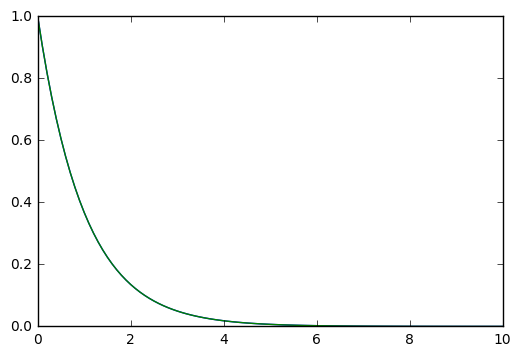

In [8]:
def time_course(X, t = 10, dt = .1):
    import matplotlib.pyplot as plt
    fig = plt.figure()
    lines = plt.plot(X)
    plt.xlim(0, t) 
    for line in lines:
        line.set_xdata([dt * x for x in line.get_xdata()]) 
    plt.show()
time_course(Y)

In [9]:
def get_X(F, X, t = 10, dt = .1):  
    def rk_step(X,F,dt):
            X = X.T.tolist()[0]
            k1 = [da(*X)*dt for da in F]
            [x + .5*y for x, y in zip(X, k1)]
            k2 = [da(*([x + .5*y for x, y in zip(X, k1)]))*dt for da in F]
            k3 = [da(*([x + .5*y for x, y in zip(X, k2)]))*dt for da in F]
            k4 = [da(*([x + y for x, y in zip(X, k3)]))*dt for da in F]
            K = [a + 2*b + 2*c + d for a,b,c,d in zip(k1,k2,k3,k4)]
            new = [x + k/6 for x,k in zip(X,K)]
            return np.matrix(new).T
   
    time = 0
    while time < t: 
        new = rk_step(X[:,-1], F, dt)
        X = np.hstack((X,new))
        time = time + dt
    return X.T
Y = get_X(F,X)

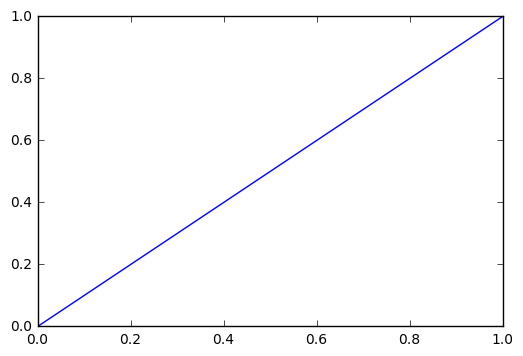

In [10]:
def phase_portrait(X):
    fig = plt.figure()
    plt.plot(X[:,0], X[:,1])
    plt.show()
phase_portrait(Y)

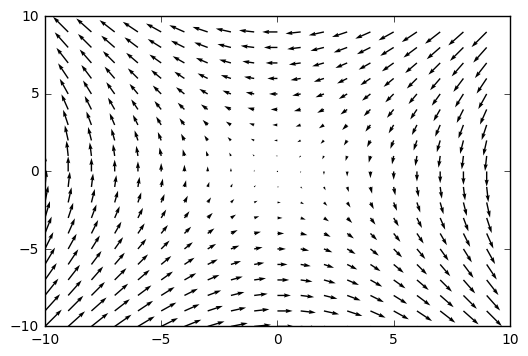

In [11]:
def vec_field(f, g, step = [1,1], scale = [-10, 10, -10, 10]):
    X, Y = np.mgrid[scale[0]:scale[1]:step[0], scale[2]:scale[3]:step[1]] # X,Y
    F, G = np.mgrid[scale[0]:scale[1]:step[0], scale[2]:scale[3]:step[1]] # Vector components
    for i in range(0,len(F)):
        for j in range(0,len(F[0])):
            F[i,j] = f(X[i,j],Y[i,j])
            G[i,j] = g(X[i,j],Y[i,j])
    plt.quiver(X, Y, F, G)
    plt.show()
vec_field(f,g)

In [46]:
def cindex(f, g, step = .1, boundary = [-1, 1, -1, 1]):
    np.linspace = scale[0],scale[1]
    #scale[2] scale [3]
    #line = [g(y)/y(x) for x,y in border[:,0],border[:,1]]
    #ind = sum(diff(line))
    return ind   
    def propagation(F, X, i = 40,   
def get_fixed(F, scale  = [-10, 10, -10, 10], cross = , endarea = 2, skip0 = False):
    fixed_points = {}
    xypairs = [np.matrix([x,y]).T for x in np.linspace(-10,10,5) for y in np.linspace(-10,10,5)]
    #Newton's metod
    for X in xypairs:
        if newton_method(F,X):
            if X in fixed_points:
                fixed_points[X] = getstability(jacobian(F,X)) 
def newton_method(F, Xi, i = 40, err = .001, round3 = True):
    for _ in range(i):
        Fi = np.matrix([da(*Xi.T.tolist()[0]) for da in F]).T
        mag = [x**2 for x in Fi.T.tolist()[0]]
        if abs(np.sqrt(sum(mag))) < err:
            if round3:
                return np.matrix([round(x,3) for x in X.T.tolist()[0]]).T
            return Xi
        Xi = Xi - jacobian(F,Xi).I * Fi

SyntaxError: invalid syntax (<ipython-input-46-cfe422463cab>, line 8)

In [47]:
def bifurc(F, par, start = 0, end = 10, step = 1):
    for p in start:end

In [22]:
def jacobian(F, X, dX = .01):
    X = X.T.tolist()[0]
    def getpartial(i):
        X[i] += dX
        up = [da(*X) for da in F]
        X[i] -= 2*dX
        down = [da(*X) for da in F]
        X[i] += dX
        return [(u - d)/2/dX for u,d in zip(up,down)]
    return np.matrix([getpartial(i) for i in range(len(X))]).T
def getstability(J):
    eig = np.linalg.eigvals(J)
    real = np.real(eig)
    imag = np.imag(eig)
    if all(x >= 0 for x in real):
        if any(x != 0 for x in imag):
            return "stable spiral"
        else:
            return "stable node"
    elif all(x <= 0 for x in real):
        if any(x != 0 for x in imag):
            return "stable spiral"
        else:
            return "stable node"
    elif all(x == 0 for x in real):
        if all(x != 0 for x in imag):
            return "center"
        else:
            return "nonstable"
    else:
        return "saddle"
    return eig
J = jacobian(F,X)
print(getstability(J))

saddle


# Functions

In [4]:
def f(x,y):
    return -y
def g(x,y):
    return -x
F = [f,g]

# Initial Values and Parameters

In [28]:
X = np.matrix([1,1]).T
